In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

g:\anaconda\envs\my_tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_csv('../TF_2_Notebooks_and_Data/DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
RSCCASN    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.columns = ['Sales']

In [8]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


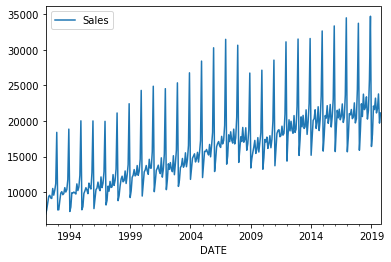

In [9]:
df.plot()

In [10]:
len(df)

334

In [11]:
len(df) - 18

316

In [12]:
test_size = 18
test_ind = len(df) - test_size

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [57]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
len(test)

18

In [29]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [30]:
X,y = generator[0]

In [31]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [32]:
y

array([[0.02047633]])

In [33]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense 

In [35]:
n_features = 1

In [36]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [41]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1) 

In [42]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 18s 60ms/step - loss: 0.0247 - val_loss: 0.0138
Epoch 2/20
304/304 [==============================] - 18s 60ms/step - loss: 0.0180 - val_loss: 0.0070
Epoch 3/20
304/304 [==============================] - 18s 60ms/step - loss: 0.0122 - val_loss: 0.0046
Epoch 4/20
304/304 [==============================] - 18s 60ms/step - loss: 0.0081 - val_loss: 0.0019
Epoch 5/20
304/304 [==============================] - 17s 57ms/step - loss: 0.0042 - val_loss: 0.0100
Epoch 6/20
304/304 [==============================] - 18s 60ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 7/20
304/304 [==============================] - 19s 61ms/step - loss: 0.0018 - val_loss: 3.6713e-04
Epoch 8/20
304/304 [==============================] - 18s 60ms/step - loss: 0.0013 - val_loss: 3.7016e-04
Epoch 9/20
304/304 [==============================] - 18s 60ms/step - loss: 0.0011 - val_loss: 0.0042


In [44]:
losses = pd.DataFrame(model.history.history)

In [45]:
losses

,loss,val_loss
0,0.024729,0.013812
1,0.018031,0.006959
2,0.012235,0.004591
3,0.008091,0.001886
4,0.004163,0.010048
5,0.002767,0.001440
6,0.001809,0.000367
7,0.001341,0.000370
8,0.001100,0.004219


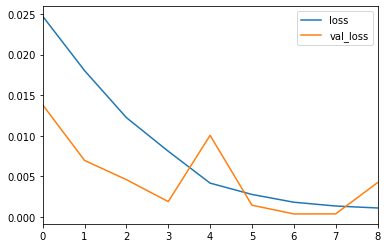

In [46]:
losses.plot()

In [59]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [60]:
true_predictions = scaler.inverse_transform(forecast)

In [61]:
true_predictions

array([[22893.1569109 ],
       [21869.47468233],
       [22109.20963335],
       [23779.05031729],
       [21475.18371296],
       [22113.23520517],
       [25609.97461891],
       [33687.39612103],
       [17700.84976459],
       [20272.39719415],
       [23576.27116632],
       [22180.56831169],
       [24102.30274963],
       [23290.94809198],
       [23545.77565384],
       [24941.95297432],
       [23059.72561646],
       [23685.46069765]])

In [62]:
test['Predictions'] = true_predictions

g:\anaconda\envs\my_tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22893.156911
2018-06-01,21589,21869.474682
2018-07-01,21919,22109.209633
2018-08-01,23381,23779.050317
2018-09-01,20260,21475.183713
2018-10-01,21473,22113.235205
2018-11-01,25831,25609.974619
2018-12-01,34706,33687.396121
2019-01-01,16410,17700.849765


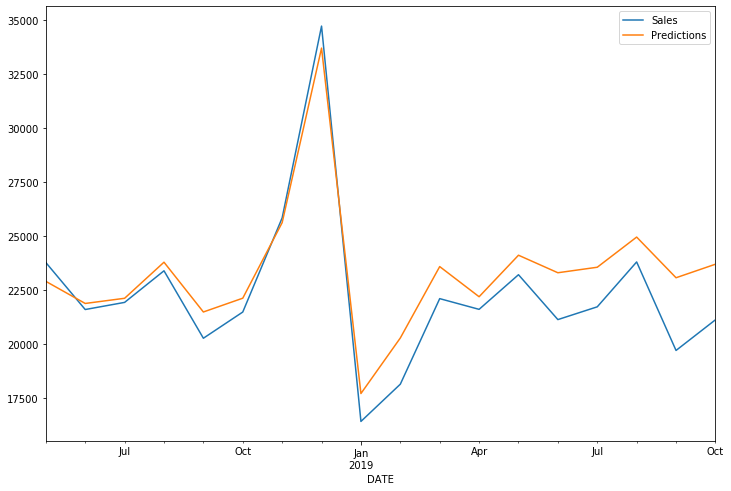

In [65]:
test.plot(figsize=(12,8))